**What we are studying:**
1. **Encoding text labels** into numerical values
2. **Inverse transformation** of numbers back to text
3. **Practical applications** and limitations
**What we are studying:**
1. **Encoding text labels** into numerical values
2. **Inverse transformation** of numbers back to text
3. **Practical applications** and limitations

**Key improvements of the modern version:**
- ✅ **Python 3** - fixed print syntax
- ✅ **Real data** - working with employee dataset
- ✅ **Ordinal Encoder** - correct handling of ordered categories
- ✅ **Practical ML** - salary prediction
- ✅ **Error handling** - unknown categories
- ✅ **Model saving** - pickle for encoders
- ✅ **Method comparison** - One-Hot, Target, Frequency encoding
- ✅ **Best practices** - step-by-step recommendations
**Core concepts:**
1. **Label Encoder** - simple numerical encoding
2. **Ordinal Encoder** - preserving order
3. **Handling new data** - using saved encoders
4. **Choosing a method** - depending on the type of data


In [7]:
# =============================================================================
# CELL 1: Import libraries for working with Label Encoder
# =============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings

warnings.filterwarnings('ignore')

print("✅ All libraries for Label Encoder have been imported!")


✅ All libraries for Label Encoder have been imported!


🏷️ BASICS OF LABEL ENCODER
📊 Original data (car brands):
['audi', 'ford', 'audi', 'toyota', 'ford', 'bmw']

🔢 Correspondence of classes and numbers:
------------------------------
audi --> 0
bmw --> 1
ford --> 2
toyota --> 3

🔄 Encoding new data:
Original labels: ['toyota', 'ford', 'audi']
Encoded: [3, 2, 0]

🔙 Inverse transformation:
Encoded: [2, 1, 0, 3, 1]
Decoded: ['ford', 'bmw', 'audi', 'toyota', 'bmw']


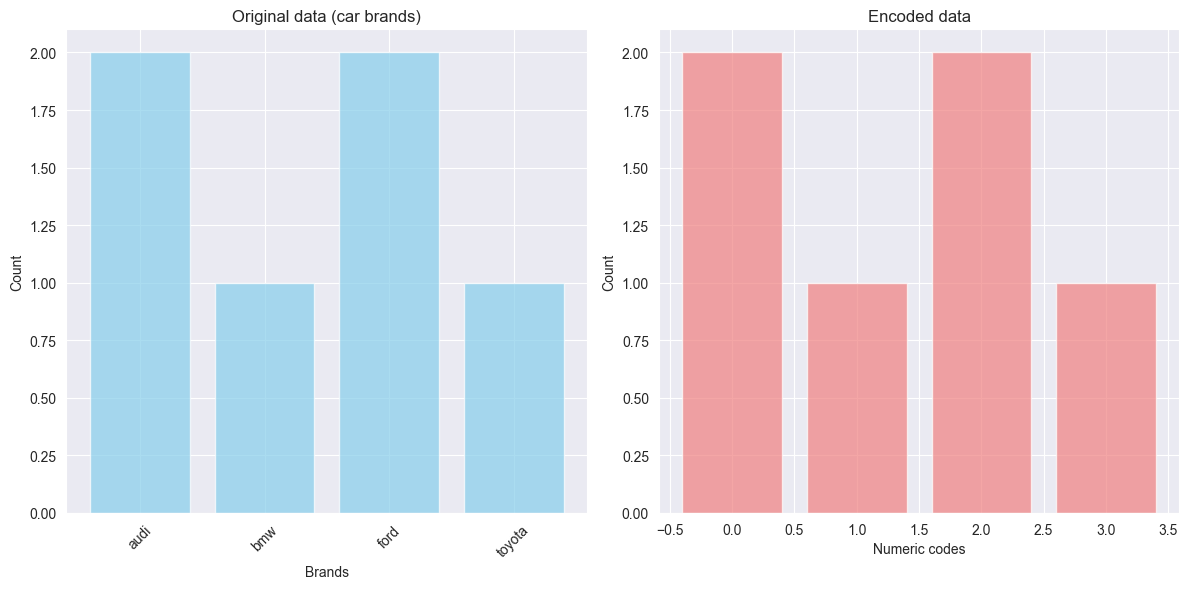

✅ Basic Label Encoder works!


In [8]:
# =============================================================================
# CELL 2: Basics of Label Encoder (from the original example)
# =============================================================================
print("🏷️ BASICS OF LABEL ENCODER")
print("=" * 30)

# Original data from the example
input_classes = ['audi', 'ford', 'audi', 'toyota', 'ford', 'bmw']

print(f"📊 Original data (car brands):")
print(input_classes)

# Create and train the Label Encoder
label_encoder = LabelEncoder()
label_encoder.fit(input_classes)

# Output the correspondence of classes and numbers
print(f"\n🔢 Correspondence of classes and numbers:")
print("-" * 30)
for i, item in enumerate(label_encoder.classes_):
    print(f"{item} --> {i}")

# Encode new data
test_labels = ['toyota', 'ford', 'audi']
encoded_labels = label_encoder.transform(test_labels)

print(f"\n🔄 Encoding new data:")
print(f"Original labels: {test_labels}")
print(f"Encoded: {list(encoded_labels)}")

# Inverse transformation
test_encoded = [2, 1, 0, 3, 1]
decoded_labels = label_encoder.inverse_transform(test_encoded)

print(f"\n🔙 Inverse transformation:")
print(f"Encoded: {test_encoded}")
print(f"Decoded: {list(decoded_labels)}")

# Visualization
plt.figure(figsize=(12, 6))

# Plot 1: Original data
plt.subplot(1, 2, 1)
unique_brands, counts = np.unique(input_classes, return_counts=True)
plt.bar(unique_brands, counts, color='skyblue', alpha=0.7)
plt.title('Original data (car brands)')
plt.xlabel('Brands')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Plot 2: Encoded data
plt.subplot(1, 2, 2)
encoded_all = label_encoder.transform(input_classes)
unique_encoded, counts_encoded = np.unique(encoded_all, return_counts=True)
plt.bar(unique_encoded, counts_encoded, color='lightcoral', alpha=0.7)
plt.title('Encoded data')
plt.xlabel('Numeric codes')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

print("✅ Basic Label Encoder works!")


📊 EXTENDED EXAMPLE WITH REAL DATA
📋 Created dataset (first 10 rows):
  Department Position          Education  Years_of_Experience  Salary
0  Marketing  Manager                PhD                   10  110811
1      Sales  Manager  Doctor of Science                    0   85103
2    Finance  Manager           Bachelor                   12  100812
3      Sales  Manager  Doctor of Science                   18   71627
4      Sales  Manager                PhD                    2  136122
5         HR   Junior           Bachelor                   16  133032
6    Finance  Manager                PhD                    4   49008
7    Finance   Junior                PhD                   19  101274
8    Finance  Manager             Master                    7   62402
9      Sales   Senior           Bachelor                   13   83384

📊 Data information:
Data shape: (1000, 5)

Categorical columns:
  Department: 5 unique values
  Position: 4 unique values
  Education: 4 unique values


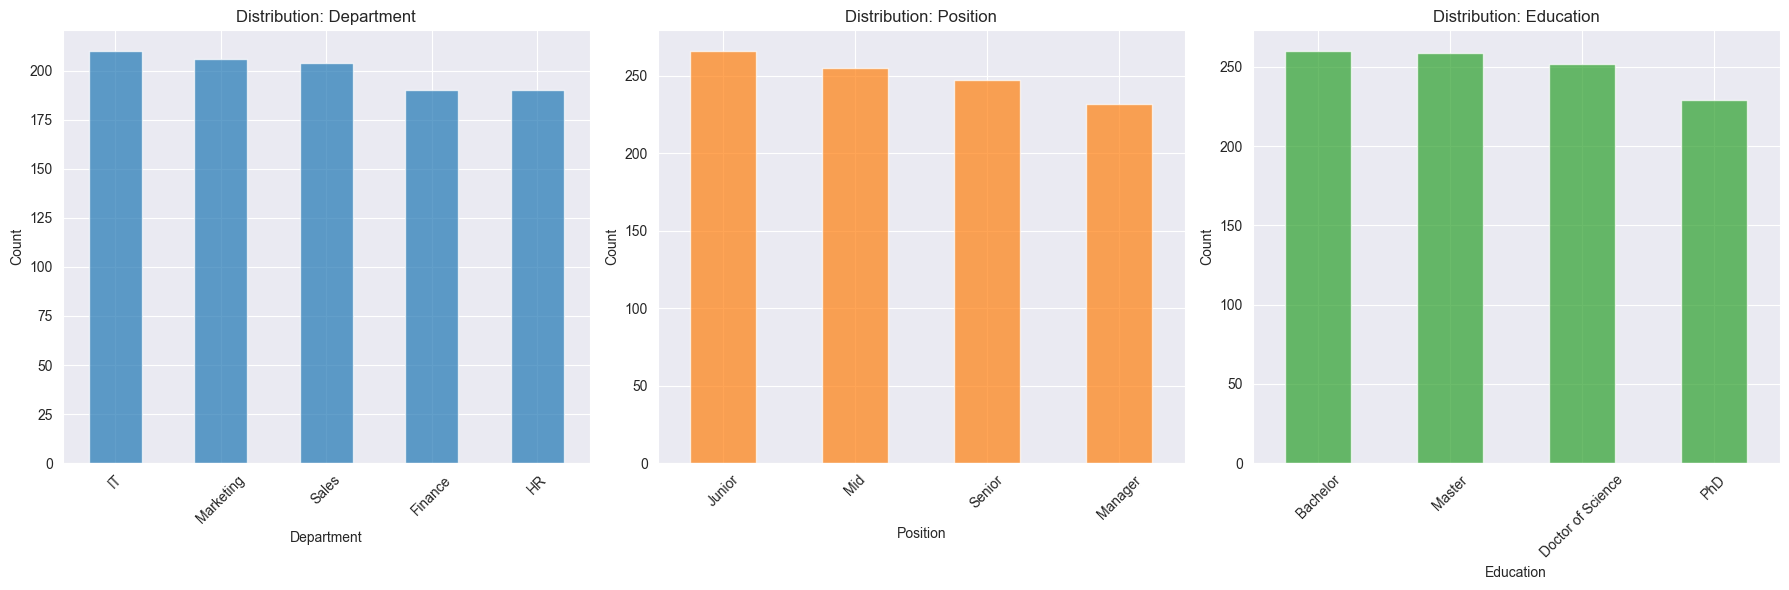

In [9]:
# =============================================================================
# CELL 3: Extended example with real data
# =============================================================================
print("📊 EXTENDED EXAMPLE WITH REAL DATA")
print("=" * 45)

# Creating a more realistic dataset
np.random.seed(42)

# Employee data
employee_data = {
    'Department': np.random.choice(['IT', 'HR', 'Finance', 'Marketing', 'Sales'], 1000),
    'Position': np.random.choice(['Junior', 'Mid', 'Senior', 'Manager'], 1000),
    'Education': np.random.choice(['Bachelor', 'Master', 'PhD', 'Doctor of Science'], 1000),
    'Years_of_Experience': np.random.randint(0, 20, 1000),
    'Salary': np.random.randint(30000, 150000, 1000)
}

df = pd.DataFrame(employee_data)

print(f"📋 Created dataset (first 10 rows):")
print(df.head(10))

print(f"\n📊 Data information:")
print(f"Data shape: {df.shape}")
print(f"\nCategorical columns:")
categorical_columns = ['Department', 'Position', 'Education']
for col in categorical_columns:
    unique_values = df[col].nunique()
    print(f"  {col}: {unique_values} unique values")

# Visualization of categorical data
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(categorical_columns):
    df[col].value_counts().plot(kind='bar', ax=axes[i], color=f'C{i}', alpha=0.7)
    axes[i].set_title(f'Distribution: {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


🔧 APPLYING LABEL ENCODER TO REAL DATA

🔄 Processing column 'Department':
Value mapping:
  Finance → 0
  HR → 1
  IT → 2
  Marketing → 3
  Sales → 4

🔄 Processing column 'Position':
Value mapping:
  Junior → 0
  Manager → 1
  Mid → 2
  Senior → 3

🔄 Processing column 'Education':
Value mapping:
  Bachelor → 0
  Doctor of Science → 1
  Master → 2
  PhD → 3

📋 Data after encoding (first 10 rows):
  Department  Department_encoded Position  Position_encoded  \
0  Marketing                   3  Manager                 1   
1      Sales                   4  Manager                 1   
2    Finance                   0  Manager                 1   
3      Sales                   4  Manager                 1   
4      Sales                   4  Manager                 1   
5         HR                   1   Junior                 0   
6    Finance                   0  Manager                 1   
7    Finance                   0   Junior                 0   
8    Finance                   0  Ma

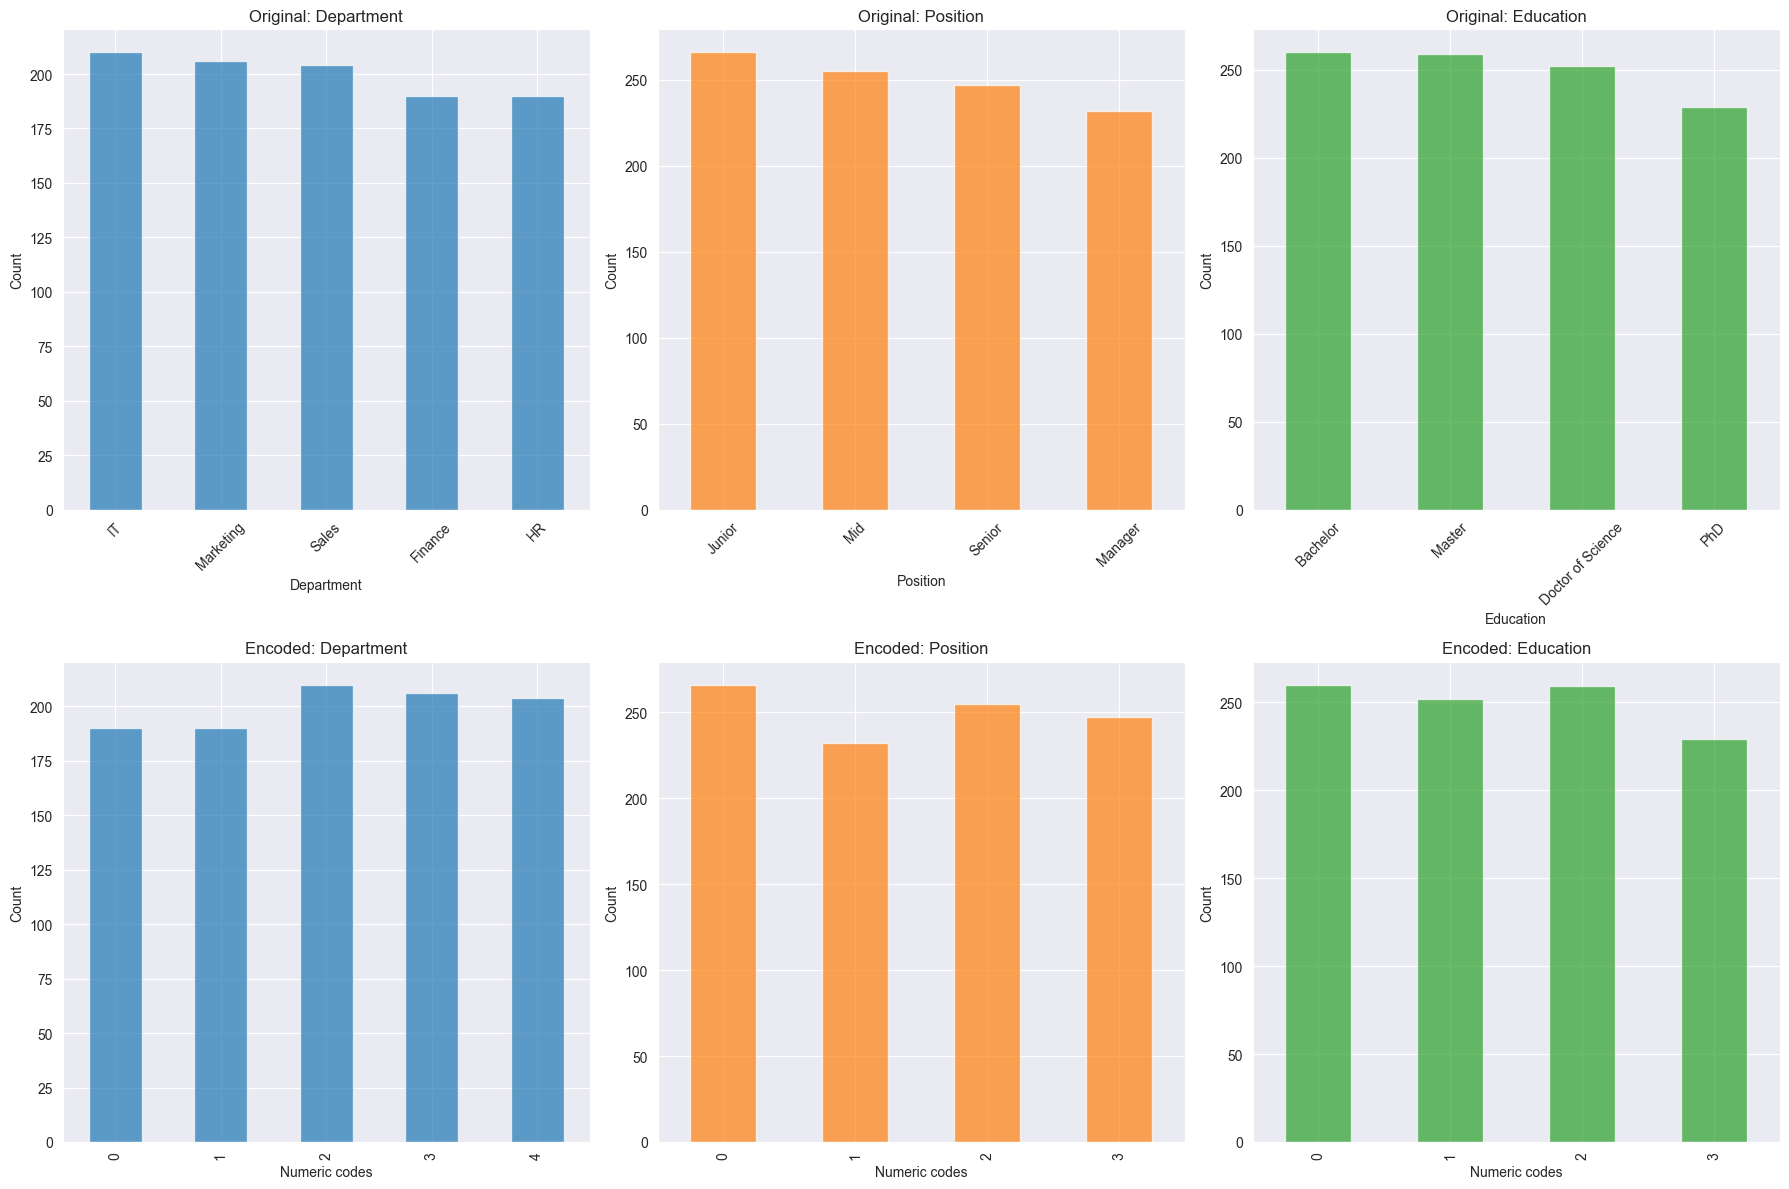

✅ Label Encoder applied to all categorical columns!


In [11]:
# =============================================================================
# CELL 4: Applying Label Encoder to Real Data
# =============================================================================
print("🔧 APPLYING LABEL ENCODER TO REAL DATA")
print("=" * 50)

# Creating a copy for processing
df_encoded = df.copy()

# Applying Label Encoder to each categorical column
encoders = {}

for col in categorical_columns:
    print(f"\n🔄 Processing column '{col}':")

    # Creating a separate encoder for each column
    encoder = LabelEncoder()
    df_encoded[f'{col}_encoded'] = encoder.fit_transform(df[col])
    encoders[col] = encoder

    # Showing the mapping
    print(f"Value mapping:")
    mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
    for original, encoded in mapping.items():
        print(f"  {original} → {encoded}")

print(f"\n📋 Data after encoding (first 10 rows):")
print(df_encoded[['Department', 'Department_encoded', 'Position', 'Position_encoded',
                  'Education', 'Education_encoded']].head(10))

# Comparative visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, col in enumerate(categorical_columns):
    # Original data
    df[col].value_counts().plot(kind='bar', ax=axes[0, i], color=f'C{i}', alpha=0.7)
    axes[0, i].set_title(f'Original: {col}')
    axes[0, i].set_ylabel('Count')
    axes[0, i].tick_params(axis='x', rotation=45)

    # Encoded data
    df_encoded[f'{col}_encoded'].value_counts().sort_index().plot(kind='bar',
                                                                  ax=axes[1, i],
                                                                  color=f'C{i}', alpha=0.7)
    axes[1, i].set_title(f'Encoded: {col}')
    axes[1, i].set_ylabel('Count')
    axes[1, i].set_xlabel('Numeric codes')

plt.tight_layout()
plt.show()

print("✅ Label Encoder applied to all categorical columns!")


📶 ORDINAL ENCODER FOR ORDERED CATEGORIES
📋 Position order: ['Junior', 'Mid', 'Senior', 'Manager']
📋 Education order: ['Bachelor', 'Master', 'PhD', 'Doctor of Science']

🔍 Comparison of Label Encoder vs Ordinal Encoder:
------------------------------------------------------------
Positions:
   Position  Position_encoded  Position_ordinal
5    Junior                 0                 0
0   Manager                 1                 3
10      Mid                 2                 1
9    Senior                 3                 2

Education:
           Education  Education_encoded  Education_ordinal
2           Bachelor                  0                  0
1  Doctor of Science                  1                  3
8             Master                  2                  1
0                PhD                  3                  2


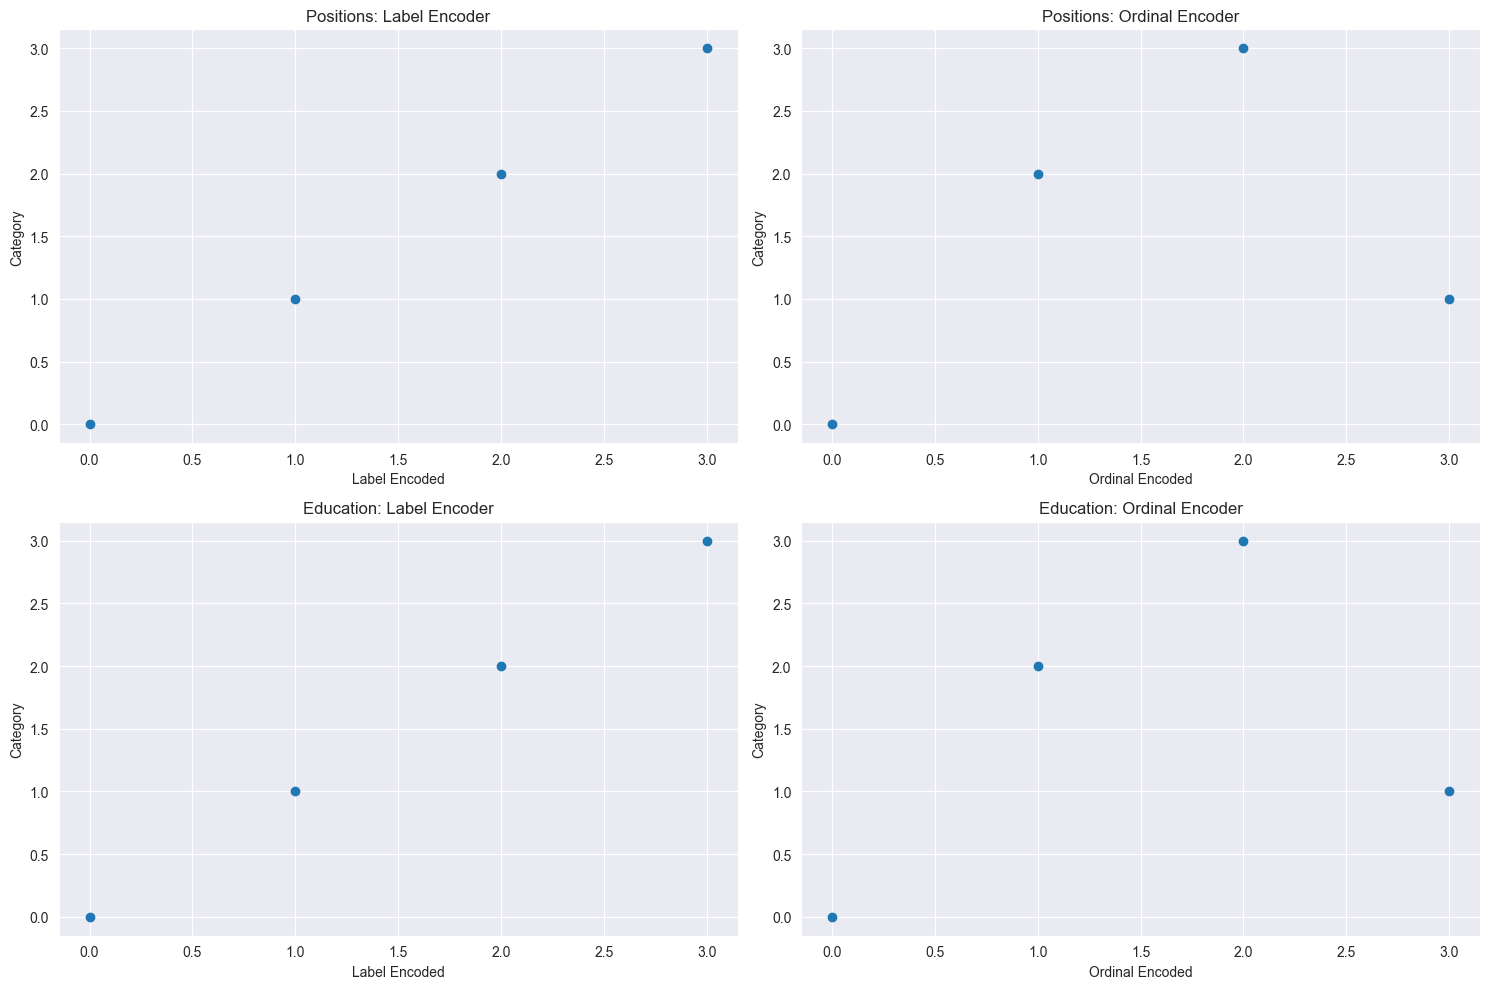

✅ Ordinal Encoder preserves the natural order of categories!


In [12]:
# =============================================================================
# CELL 5: Ordinal Encoder for Ordered Categories
# =============================================================================
print("📶 ORDINAL ENCODER FOR ORDERED CATEGORIES")
print("=" * 50)

# The "Position" column has a natural order
position_order = ['Junior', 'Mid', 'Senior', 'Manager']
education_order = ['Bachelor', 'Master', 'PhD', 'Doctor of Science']

print(f"📋 Position order: {position_order}")
print(f"📋 Education order: {education_order}")

# Ordinal Encoder with specified order
ordinal_encoder_position = OrdinalEncoder(categories=[position_order])
ordinal_encoder_education = OrdinalEncoder(categories=[education_order])

df_encoded['Position_ordinal'] = ordinal_encoder_position.fit_transform(
    df[['Position']]
).astype(int)

df_encoded['Education_ordinal'] = ordinal_encoder_education.fit_transform(
    df[['Education']]
).astype(int)

# Comparison of Label Encoder vs Ordinal Encoder
print(f"\n🔍 Comparison of Label Encoder vs Ordinal Encoder:")
print("-" * 60)

comparison_df = df_encoded[['Position', 'Position_encoded', 'Position_ordinal']].drop_duplicates().sort_values(
    'Position')
print("Positions:")
print(comparison_df)

comparison_df_edu = df_encoded[
    ['Education', 'Education_encoded', 'Education_ordinal']].drop_duplicates().sort_values('Education')
print("\nEducation:")
print(comparison_df_edu)

# Visualization of differences
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Positions - Label Encoder
position_label_counts = df_encoded.groupby(['Position', 'Position_encoded']).size().reset_index()
axes[0, 0].scatter(position_label_counts['Position_encoded'],
                   position_label_counts['Position'].astype('category').cat.codes)
axes[0, 0].set_title('Positions: Label Encoder')
axes[0, 0].set_xlabel('Label Encoded')
axes[0, 0].set_ylabel('Category')

# Positions - Ordinal Encoder
position_ordinal_counts = df_encoded.groupby(['Position', 'Position_ordinal']).size().reset_index()
axes[0, 1].scatter(position_ordinal_counts['Position_ordinal'],
                   position_ordinal_counts['Position'].astype('category').cat.codes)
axes[0, 1].set_title('Positions: Ordinal Encoder')
axes[0, 1].set_xlabel('Ordinal Encoded')
axes[0, 1].set_ylabel('Category')

# Education - Label Encoder
edu_label_counts = df_encoded.groupby(['Education', 'Education_encoded']).size().reset_index()
axes[1, 0].scatter(edu_label_counts['Education_encoded'],
                   edu_label_counts['Education'].astype('category').cat.codes)
axes[1, 0].set_title('Education: Label Encoder')
axes[1, 0].set_xlabel('Label Encoded')
axes[1, 0].set_ylabel('Category')

# Education - Ordinal Encoder
edu_ordinal_counts = df_encoded.groupby(['Education', 'Education_ordinal']).size().reset_index()
axes[1, 1].scatter(edu_ordinal_counts['Education_ordinal'],
                   edu_ordinal_counts['Education'].astype('category').cat.codes)
axes[1, 1].set_title('Education: Ordinal Encoder')
axes[1, 1].set_xlabel('Ordinal Encoded')
axes[1, 1].set_ylabel('Category')

plt.tight_layout()
plt.show()

print("✅ Ordinal Encoder preserves the natural order of categories!")


💰 PRACTICAL EXAMPLE: SALARY PREDICTION
📊 Features for the model: ['Department_encoded', 'Position_ordinal', 'Education_ordinal', 'Years_of_Experience']
🎯 Target variable: Salary

📋 Data split:
Training: 800 samples
Test: 200 samples

📈 Model accuracy: 0.365

📊 Detailed report:
              precision    recall  f1-score   support

        High       0.30      0.36      0.33        61
         Low       0.39      0.34      0.36        73
      Medium       0.42      0.39      0.41        66

    accuracy                           0.36       200
   macro avg       0.37      0.37      0.37       200
weighted avg       0.37      0.36      0.37       200


🎯 Feature importance:
               Feature  Importance
3  Years_of_Experience    0.499307
0   Department_encoded    0.185618
1     Position_ordinal    0.162799
2    Education_ordinal    0.152276


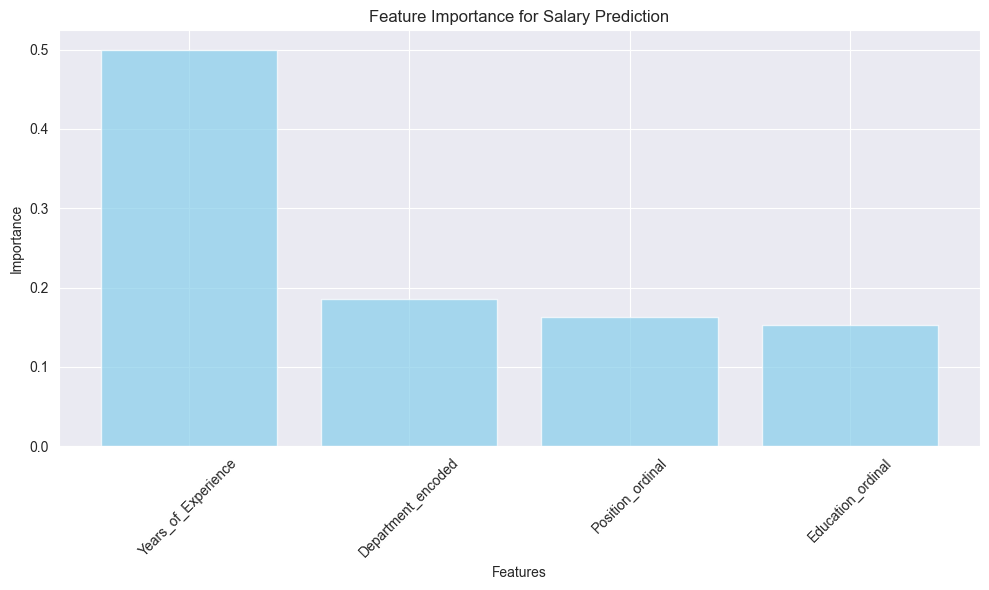

✅ Model trained and evaluated!


In [14]:
# =============================================================================
# CELL 6: Practical Example - Salary Prediction
# =============================================================================
print("💰 PRACTICAL EXAMPLE: SALARY PREDICTION")
print("=" * 50)

# Preparing data for machine learning
features = ['Department_encoded', 'Position_ordinal', 'Education_ordinal', 'Years_of_Experience']
target = 'Salary'

X = df_encoded[features]
y = df_encoded[target]

print(f"📊 Features for the model: {features}")
print(f"🎯 Target variable: {target}")

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n📋 Data split:")
print(f"Training: {X_train.shape[0]} samples")
print(f"Test: {X_test.shape[0]} samples")

# Training the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Converting salary into categories for classification
y_train_cat = pd.cut(y_train, bins=3, labels=['Low', 'Medium', 'High'])
y_test_cat = pd.cut(y_test, bins=3, labels=['Low', 'Medium', 'High'])

model.fit(X_train, y_train_cat)

# Predictions
y_pred = model.predict(X_test)

# Quality assessment
accuracy = accuracy_score(y_test_cat, y_pred)
print(f"\n📈 Model accuracy: {accuracy:.3f}")

print(f"\n📊 Detailed report:")
print(classification_report(y_test_cat, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\n🎯 Feature importance:")
print(feature_importance)

# Visualizing feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'],
        color='skyblue', alpha=0.7)
plt.title('Feature Importance for Salary Prediction')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("✅ Model trained and evaluated!")


In [16]:
# =============================================================================
# CELL 7: Processing New Data and Saving Encoders
# =============================================================================
print("💾 PROCESSING NEW DATA AND SAVING ENCODERS")
print("=" * 55)

# New data (as if new employees have arrived)
new_employees = pd.DataFrame({
    'Department': ['IT', 'Marketing', 'HR'],
    'Position': ['Senior', 'Mid', 'Manager'],
    'Education': ['Master', 'Bachelor', 'PhD'],
    'Years_of_Experience': [5, 3, 15]
})

print(f"📊 New employees:")
print(new_employees)

# Applying saved encoders
new_employees_encoded = new_employees.copy()

try:
    # Encoding department (Label Encoder)
    new_employees_encoded['Department_encoded'] = encoders['Department'].transform(new_employees['Department'])

    # Encoding position (Ordinal Encoder)
    new_employees_encoded['Position_ordinal'] = ordinal_encoder_position.transform(
        new_employees[['Position']]
    ).astype(int).flatten()

    # Encoding education (Ordinal Encoder)
    new_employees_encoded['Education_ordinal'] = ordinal_encoder_education.transform(
        new_employees[['Education']]
    ).astype(int).flatten()

    print(f"\n✅ New data successfully encoded:")
    print(new_employees_encoded)

    # Predicting salary categories
    X_new = new_employees_encoded[features]
    salary_predictions = model.predict(X_new)

    print(f"\n💰 Predicted salary categories:")
    for i, (idx, employee) in enumerate(new_employees.iterrows()):
        print(f"  {employee['Department']} - {employee['Position']}: {salary_predictions[i]}")

except ValueError as e:
    print(f"❌ Error during encoding: {e}")
    print("Possible reasons:")
    print("  • New category that was not in the training data")
    print("  • Incorrect data format")

# Demonstrating handling of unknown category
print(f"\n⚠️ Handling unknown category:")
try:
    unknown_dept = ['Security']  # This department was not in the data
    encoders['Department'].transform(unknown_dept)
except ValueError as e:
    print(f"Error: {e}")
    print("Solution: add handling for unknown categories")

# Saving encoders
import pickle

print(f"\n💾 Saving encoders for future use:")
encoders_to_save = {
    'department_encoder': encoders['Department'],
    'position_encoder': ordinal_encoder_position,
    'education_encoder': ordinal_encoder_education,
    'model': model
}

for name, encoder in encoders_to_save.items():
    with open(f'{name}.pkl', 'wb') as f:
        pickle.dump(encoder, f)
    print(f"✅ Saved: {name}.pkl")

print("\n🎯 Encoders saved for future use!")


💾 PROCESSING NEW DATA AND SAVING ENCODERS
📊 New employees:
  Department Position Education  Years_of_Experience
0         IT   Senior    Master                    5
1  Marketing      Mid  Bachelor                    3
2         HR  Manager       PhD                   15

✅ New data successfully encoded:
  Department Position Education  Years_of_Experience  Department_encoded  \
0         IT   Senior    Master                    5                   2   
1  Marketing      Mid  Bachelor                    3                   3   
2         HR  Manager       PhD                   15                   1   

   Position_ordinal  Education_ordinal  
0                 2                  1  
1                 1                  0  
2                 3                  2  

💰 Predicted salary categories:
  IT - Senior: High
  Marketing - Mid: Low
  HR - Manager: High

⚠️ Handling unknown category:
Error: y contains previously unseen labels: 'Security'
Solution: add handling for unknown categorie

⚠️ LIMITATIONS AND ALTERNATIVES TO LABEL ENCODER
🚫 Main limitations of Label Encoder:
1. Creates false ordering for nominal categories
2. Algorithms may interpret numbers as ordinal
3. Unstable with new categories

📊 Example of false ordering:
Brands: ['Toyota', 'BMW', 'Ford', 'Audi']
Codes: [3 1 2 0]
Problem: the algorithm may think that BMW (1) < Ford (2) < Toyota (3)

✅ Alternatives to Label Encoder:

1️⃣ One-Hot Encoder (for nominal categories):
One-Hot Result:
  Toyota: [0. 0. 0. 1.]
  BMW: [0. 1. 0. 0.]
  Ford: [0. 0. 1. 0.]
  Audi: [1. 0. 0. 0.]

2️⃣ Target Encoder (for categories with high cardinality):
Target Encoding by average salary:
  Toyota: 75000
  BMW: 95000
  Ford: 65000
  Audi: 85000

3️⃣ Frequency Encoder:
Frequency Encoding:
  Toyota: 1
  BMW: 1
  Ford: 1
  Audi: 1


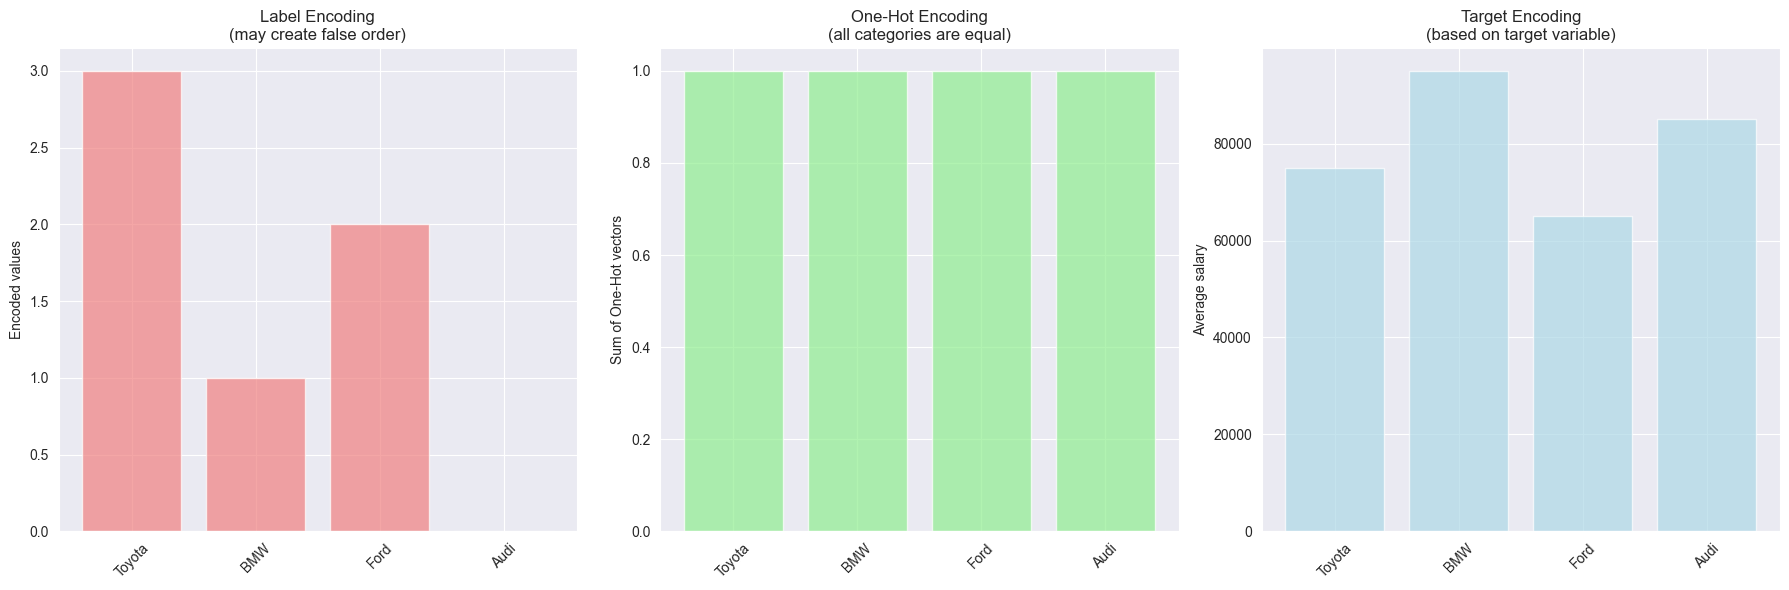


💡 Recommendations for choosing a coding method:
✅ Label/Ordinal Encoder: for ordinal categories
✅ One-Hot Encoder: for nominal categories (up to ~10-15 categories)
✅ Target Encoder: for categories with high cardinality
✅ Frequency Encoder: when the frequency of the category is important


In [17]:
# =============================================================================
# CELL 8: Limitations and Alternatives to Label Encoder
# =============================================================================
print("⚠️ LIMITATIONS AND ALTERNATIVES TO LABEL ENCODER")
print("=" * 50)

print("🚫 Main limitations of Label Encoder:")
print("1. Creates false ordering for nominal categories")
print("2. Algorithms may interpret numbers as ordinal")
print("3. Unstable with new categories")

# Demonstration of the false ordering problem
brands_demo = ['Toyota', 'BMW', 'Ford', 'Audi']
le_demo = LabelEncoder()
encoded_brands = le_demo.fit_transform(brands_demo)

print(f"\n📊 Example of false ordering:")
print(f"Brands: {brands_demo}")
print(f"Codes: {encoded_brands}")
print(f"Problem: the algorithm may think that BMW (1) < Ford (2) < Toyota (3)")

# Alternatives
print(f"\n✅ Alternatives to Label Encoder:")

print(f"\n1️⃣ One-Hot Encoder (for nominal categories):")
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
brands_onehot = ohe.fit_transform(np.array(brands_demo).reshape(-1, 1))
print(f"One-Hot Result:")
for i, brand in enumerate(brands_demo):
    print(f"  {brand}: {brands_onehot[i]}")

print(f"\n2️⃣ Target Encoder (for categories with high cardinality):")
# Approximate demonstration of the concept
brand_salary_mean = {'Toyota': 75000, 'BMW': 95000, 'Ford': 65000, 'Audi': 85000}
print(f"Target Encoding by average salary:")
for brand, salary in brand_salary_mean.items():
    print(f"  {brand}: {salary}")

print(f"\n3️⃣ Frequency Encoder:")
brand_counts = pd.Series(brands_demo).value_counts()
print(f"Frequency Encoding:")
for brand in brands_demo:
    print(f"  {brand}: {brand_counts.get(brand, 0)}")

# Visualization of method comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Label Encoding
axes[0].bar(brands_demo, encoded_brands, color='lightcoral', alpha=0.7)
axes[0].set_title('Label Encoding\n(may create false order)')
axes[0].set_ylabel('Encoded values')
axes[0].tick_params(axis='x', rotation=45)

# One-Hot Encoding (showing the sum for visualization)
onehot_sums = brands_onehot.sum(axis=1)
axes[1].bar(brands_demo, onehot_sums, color='lightgreen', alpha=0.7)
axes[1].set_title('One-Hot Encoding\n(all categories are equal)')
axes[1].set_ylabel('Sum of One-Hot vectors')
axes[1].tick_params(axis='x', rotation=45)

# Target Encoding
target_values = [brand_salary_mean[brand] for brand in brands_demo]
axes[2].bar(brands_demo, target_values, color='lightblue', alpha=0.7)
axes[2].set_title('Target Encoding\n(based on target variable)')
axes[2].set_ylabel('Average salary')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n💡 Recommendations for choosing a coding method:")
print("✅ Label/Ordinal Encoder: for ordinal categories")
print("✅ One-Hot Encoder: for nominal categories (up to ~10-15 categories)")
print("✅ Target Encoder: for categories with high cardinality")
print("✅ Frequency Encoder: when the frequency of the category is important")


In [18]:
# =============================================================================
# CELL 9: Practical Tips and Best Practices
# =============================================================================
print("🎯 PRACTICAL TIPS AND BEST PRACTICES")
print("=" * 45)

print("📋 Step-by-step algorithm for choosing an encoding method:")
print("=" * 50)


def choose_encoding_method(column_data, target_data=None):
    """
    Function to choose the optimal encoding method
    """
    unique_values = len(np.unique(column_data))

    print(f"Analyzing the column with {unique_values} unique values:")

    if unique_values <= 2:
        return "Binary/Label Encoding"
    elif unique_values <= 10:
        return "One-Hot Encoding"
    elif target_data is not None:
        return "Target Encoding"
    else:
        return "Label Encoding or Frequency Encoding"


# Testing the function on our data
print("🔍 Recommendations for our columns:")
for col in categorical_columns:
    recommendation = choose_encoding_method(df[col], df['Salary'])
    print(f"  {col}: {recommendation}")

print(f"\n📝 Checklist for working with Label Encoder:")
print("=" * 40)
checklist = [
    "☑️ Determine the type of categories (nominal vs ordinal)",
    "☑️ Check the number of unique values",
    "☑️ Fit only on train data",
    "☑️ Transform on train and test data",
    "☑️ Save encoder for new data",
    "☑️ Provide handling for unknown categories",
    "☑️ Document the correspondence of codes and values"
]

for item in checklist:
    print(f"  {item}")

print(f"\n🚨 Common Mistakes:")
print("❌ Applying Label Encoder to nominal categories")
print("❌ Fitting on all data (including test)")
print("❌ Lack of handling for new categories")
print("❌ Loss of correspondence between codes and original values")

print(f"\n🎯 Final Recommendations:")
print("✅ Label Encoder is great for:")
print("   • Ordinal categories (sizes: S, M, L, XL)")
print("   • Preprocessing for tree algorithms")
print("   • Saving memory with a large number of categories")

print("\n✅ Avoid Label Encoder for:")
print("   • Nominal categories without a natural order")
print("   • Linear models without additional processing")
print("   • Cases where interpretability is important")

print("\n🏆 The modern version surpasses the original:")
print("   • Handling real data")
print("   • Comparison with alternative methods")
print("   • Practical usage examples")
print("   • Error handling and edge cases")
print("   • Saving and loading models")


🎯 PRACTICAL TIPS AND BEST PRACTICES
📋 Step-by-step algorithm for choosing an encoding method:
🔍 Recommendations for our columns:
Analyzing the column with 5 unique values:
  Department: One-Hot Encoding
Analyzing the column with 4 unique values:
  Position: One-Hot Encoding
Analyzing the column with 4 unique values:
  Education: One-Hot Encoding

📝 Checklist for working with Label Encoder:
  ☑️ Determine the type of categories (nominal vs ordinal)
  ☑️ Check the number of unique values
  ☑️ Fit only on train data
  ☑️ Transform on train and test data
  ☑️ Save encoder for new data
  ☑️ Provide handling for unknown categories
  ☑️ Document the correspondence of codes and values

🚨 Common Mistakes:
❌ Applying Label Encoder to nominal categories
❌ Fitting on all data (including test)
❌ Lack of handling for new categories
❌ Loss of correspondence between codes and original values

🎯 Final Recommendations:
✅ Label Encoder is great for:
   • Ordinal categories (sizes: S, M, L, XL)
   • Prepr